In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D,BatchNormalization

In [2]:
from PIL import Image
image_data = []
labels = []
classes = 43
cur_path = "DataSet/Train"

for i in range(classes):
    path = os.path.join('DataSet/', 'Train',str(i))
    images = os.listdir(path)
#DataSet/Train
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            image_data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#lists into numpy arrays

data = np.array(image_data)
labels = np.array(labels)

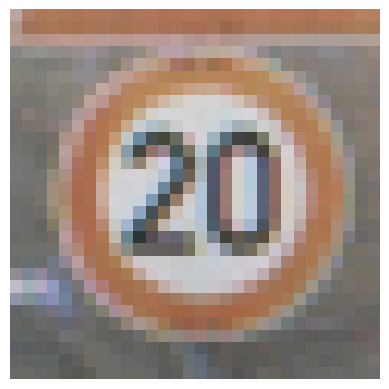

In [9]:
import matplotlib.pyplot as plt

# Display the sample image
plt.imshow(image_data[0])
plt.axis('off')
plt.show()

## split the Data

In [10]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,shuffle=True, random_state=23)

In [12]:
# OneHotEncoding for the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [14]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

print("y_train: ", y_train.shape)
print("y_test ", y_test.shape)

X_train:  (31367, 30, 30, 3)
X_test:  (7842, 30, 30, 3)
y_train:  (31367, 43)
y_test  (7842, 43)


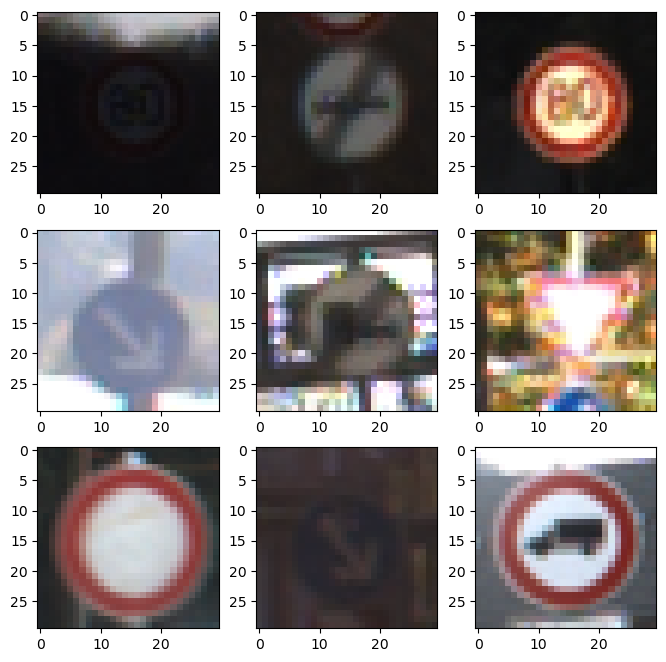

In [111]:
plt.figure(figsize=(8, 8))

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])

plt.show()

In [15]:
model = Sequential([
    # the input layer
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),

    # 1st hidden layer
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    # 2nd hidden layer
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # 3rd hidden layer
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # the output layer
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,747 (1.67 MB)

 Trainable params: 436,235 (1.66 MB)

 Non-trainable params: 512 (2.00 KB)

In [17]:
epochs = 30

In [18]:
history = model.fit(X_train, y_train, batch_size=100, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.4204 - loss: 2.3955 - val_accuracy: 0.9357 - val_loss: 0.3588
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9214 - loss: 0.3094 - val_accuracy: 0.9816 - val_loss: 0.1009
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9647 - loss: 0.1426 - val_accuracy: 0.9906 - val_loss: 0.0469
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.9782 - loss: 0.0867 - val_accuracy: 0.9909 - val_loss: 0.0373
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.9860 - loss: 0.0568 - val_accuracy: 0.9846 - val_loss: 0.0557
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9860 - loss: 0.0546 - val_accuracy: 0.9949 - val_loss: 0.0238
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 31s 97ms/step - accuracy: 0.9913 - loss: 0.0329 - val_accuracy: 0.9972 - val_loss: 0.0123
Epoch 8/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9929 - loss: 0.0291 - 

In [19]:
# evaluate the model
model.evaluate(X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9937 - loss: 0.0182


[0.023180615156888962, 0.9933690428733826]

In [20]:
y_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [33]:
y_true = pd.read_csv('DataSet/Test.csv')
image_labels = y_true['ClassId'].values
image_path = y_true['Path'].values

data = []

for img in image_path:
    image = Image.open('./DataSet/' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))


X_test = np.array(data)
y_pred = np.argmax(model.predict(X_test), axis=1)


['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


0.965083135391924

In [36]:
print(f"Accuracy: {accuracy_score(image_labels, y_pred)*100:.3f}")

Accuracy: 96.508


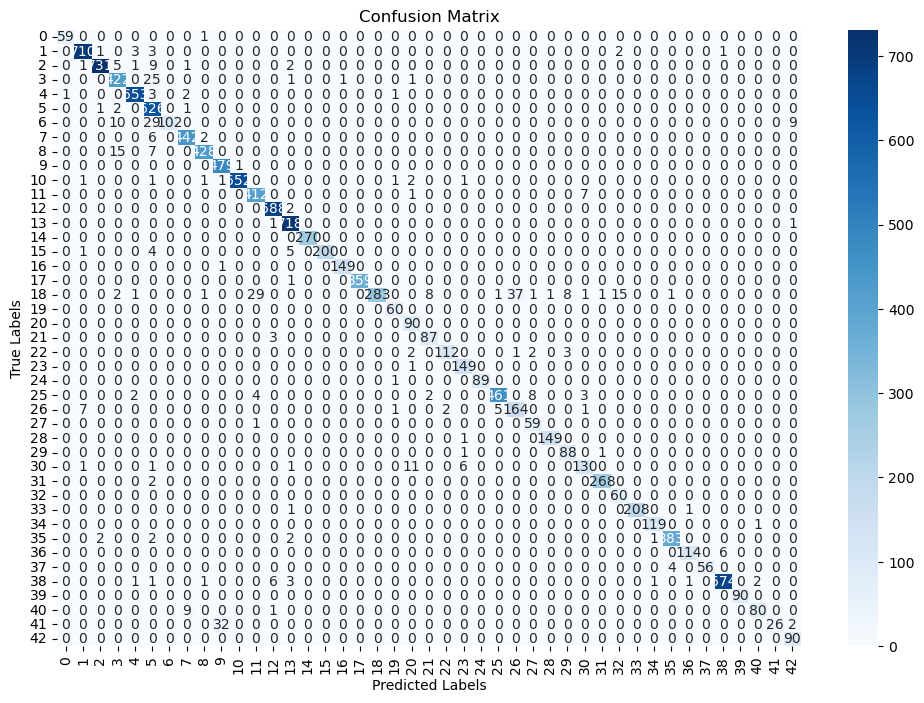

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.99      0.99       720
           2       0.99      0.97      0.98       750
           3       0.93      0.94      0.93       450
           4       0.99      0.99      0.99       660
           5       0.87      0.99      0.93       630
           6       1.00      0.68      0.81       150
           7       0.97      0.98      0.98       450
           8       0.99      0.95      0.97       450
           9       0.93      1.00      0.96       480
          10       1.00      0.99      0.99       660
          11       0.92      0.98      0.95       420
          12       0.98      1.00      0.99       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      0.95      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [34]:
conf_matrix = confusion_matrix(image_labels, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [39]:
print(classification_report(image_labels, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.99      0.99       720
           2       0.99      0.97      0.98       750
           3       0.93      0.94      0.93       450
           4       0.99      0.99      0.99       660
           5       0.87      0.99      0.93       630
           6       1.00      0.68      0.81       150
           7       0.97      0.98      0.98       450
           8       0.99      0.95      0.97       450
           9       0.93      1.00      0.96       480
          10       1.00      0.99      0.99       660
          11       0.92      0.98      0.95       420
          12       0.98      1.00      0.99       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      0.95      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    